In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [3]:
train_data = pd.read_csv("data\\train.csv")
test_data = pd.read_csv("data\\test.csv")

In [4]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test_data.head

<bound method NDFrame.head of          id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
3261 

In [6]:
#checking dimensionality of the train and test dataSet
rows_train, cols_train = train_data.shape
print('\033[1m' + "Train Dataset :" + '\033[0m')
print(f'\tThe no.of rows = {rows_train}')
print(f'\tThe no.of columns = {cols_train}')
print('-'*50)
rows_test, cols_test = test_data.shape
print('\033[1m' + "Test Dataset :" + '\033[0m')
print(f'\tThe no.of rows = {rows_test}')
print(f'\tThe no.of columns = {cols_test}')

Train Dataset :
	The no.of rows = 7613
	The no.of columns = 5
--------------------------------------------------
Test Dataset :
	The no.of rows = 3263
	The no.of columns = 4


In [7]:
#Checking for sum of null values present in both train and test datset.
print('\033[1m' + "Sum of NULL values in Train dataSet:" + '\033[0m')
print(train_data.isnull().sum())
print('-'*20)
print('\033[1m' + "Sum of NULL values in Test dataSet:" + '\033[0m')
print(test_data.isnull().sum())

Sum of NULL values in Train dataSet:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
--------------------
Sum of NULL values in Test dataSet:
id             0
keyword       26
location    1105
text           0
dtype: int64


In [8]:
#Dropping 'keyword' and 'location' columns in both train and test dataset
train_data.drop(['keyword', 'location'], axis=1, inplace = True)

test_data.drop(['keyword', 'location'], axis=1, inplace = True)

C:\Users\Mehmet\.conda\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

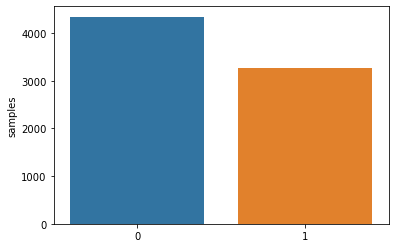

In [9]:
x=train_data.target.value_counts()
sbn.barplot(x.index,x)
plt.gca().set_ylabel('samples')

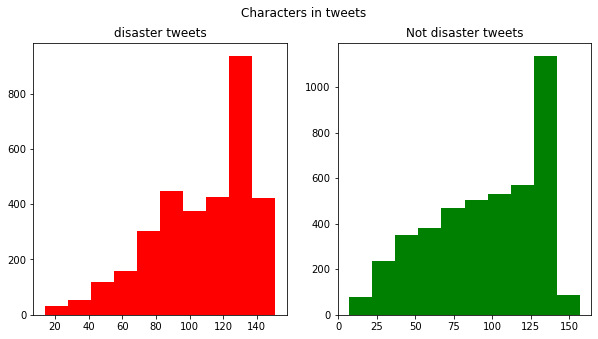

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_data[train_data['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train_data[train_data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

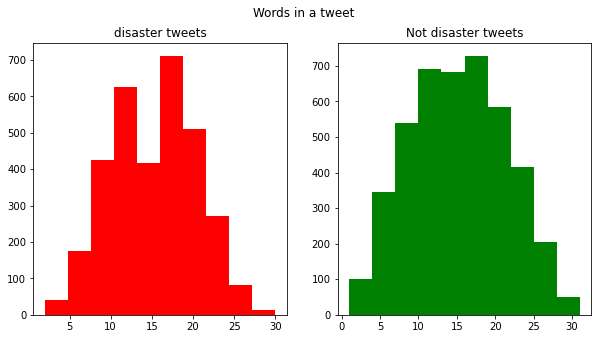

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_data[train_data['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train_data[train_data['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

C:\Users\Mehmet\.conda\envs\tf2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mehmet\.conda\envs\tf2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each tweet')

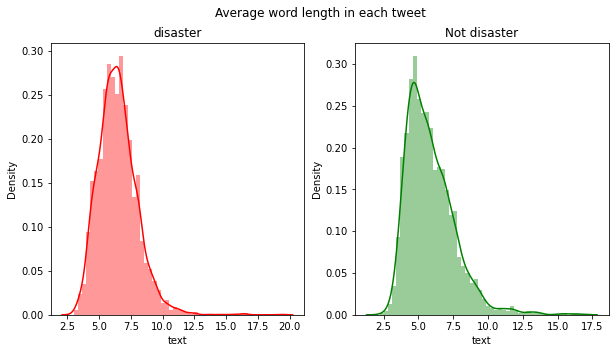

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_data[train_data['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sbn.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train_data[train_data['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sbn.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')